In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor # asta este modelul de regresie lineara 
from sklearn.preprocessing import StandardScaler  # aparent acesta este folosit pentru normalizare
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')


In [7]:
X_train, y_train = load_house_data()
X_features  = ['marime(m^2)', 'numar_camere', 'etaje','an_constructie']

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print('pic2pic in raw:')
print(np.ptp(X_train, axis=0))
print('pic2pic in normalized:')
print(np.ptp(X_norm, axis=0))


# Initializing the regression
regression = SGDRegressor(max_iter=10000)

#Fitting the model (this means fitting the values back on the actual values )
regression.fit(X_norm,y_train)
print(regression.n_iter_)

print(f'Number of iterations:{regression.n_iter_}'  )
print(f'No. of weight updates:{regression.t_}')

w = regression.coef_  # how you get the weights
b = regression.intercept_   # how you get the bias

print(f'Weights: {w}')
print(f'bias:{b}')


pic2pic in raw:
[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
pic2pic in normalized:
[5.85 6.14 2.06 3.69]
121
Number of iterations:121
No. of weight updates:11980.0
Weights: [110.14 -21.04 -32.44 -38.04]
bias:[363.14]


In [42]:
#Let's make a prediction with the model using predict() method from SGDRegression
y_hat = regression.predict(X_norm)

# let's make a prediction, manually with the weights we got 
y_hat2 = np.dot(X_norm,w) + b
print(f'SGDR Predictions:{y_hat[:10]}')
print(f'Manual prediction with SGDR weights:{y_hat2[:10]}')
print(f'Are they the same??????{(y_hat==y_hat2).all()}')
print(f'Actual values of Y:{y_train[:10]}')

SGDR Predictions:[295.16 485.93 389.64 492.09 419.93 222.79 522.92 267.81 684.06 181.8 ]
Manual prediction with SGDR weights:[295.16 485.93 389.64 492.09 419.93 222.79 522.92 267.81 684.06 181.8 ]
Are they the same??????True
Actual values of Y:[300.  509.8 394.  540.  415.  230.  560.  294.  718.2 200. ]


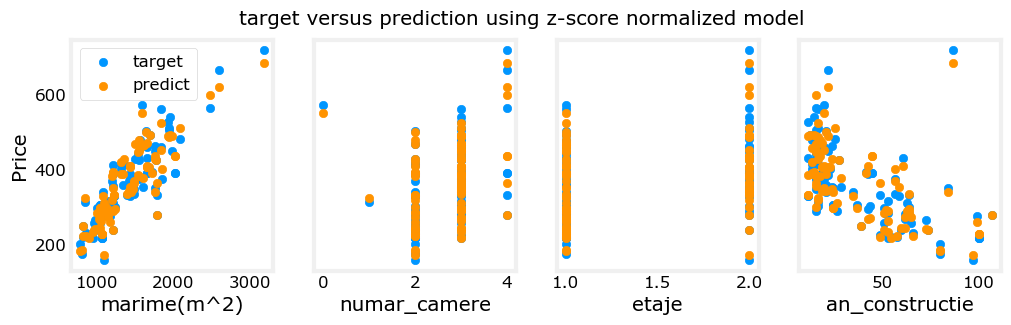

In [44]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_hat,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()